In [1]:
import cuml
cuml.__version__

'23.08.00'

[D] [13:21:19.862521] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:69 Data size = (3000, 512) with dim = 2 perplexity = 40.000000
[D] [13:21:19.862617] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:107 Getting distances.
[D] [13:21:20.279256] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:142 Now normalizing distances so exp(D) doesn't explode.
[D] [13:21:20.279797] /opt/conda/conda-bld/work/cpp/src/tsne/tsne_runner.cuh:150 Searching for optimal perplexity via bisection search.
[D] [13:21:20.296625] /opt/conda/conda-bld/work/cpp/src/tsne/barnes_hut_tsne.cuh:68 N_nodes = 81919 blocks = 80
[D] [13:21:20.297465] /opt/conda/conda-bld/work/cpp/src/tsne/barnes_hut_tsne.cuh:156 Start gradient updates!
[D] [13:21:20.900343] /opt/conda/conda-bld/work/cpp/src/tsne/barnes_hut_tsne.cuh:322 SymmetrizeTime = 1 (0)
DistancesTime = 417 (50)
NormalizeTime = 0 (0)
PerplexityTime = 16 (2)
BoundingBoxKernel_time = 27 (3)
ClearKernel1_time  = 204 (24)
TreeBuildingKernel_time  = 1

/raid/data/mambaforge/envs/rapids-23.08/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[t-SNE] Computed neighbors for 3000 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.002210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.982788
[t-SNE] KL divergence after 1000 iterations: 2.773570


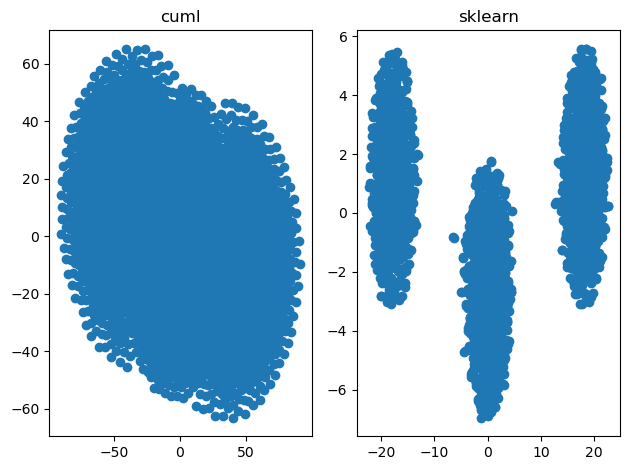

In [2]:
import numpy as np
# Generate data
np.random.seed(0)
mean = np.zeros(512)  # Mean of the distribution
covariance_matrix = np.eye(512)  # Identity matrix as covariance matrix

sample_size = 1000
random_sample1 = np.random.multivariate_normal(mean-10, covariance_matrix, sample_size)
random_sample2 = np.random.multivariate_normal(mean+10, covariance_matrix, sample_size)
random_sample3 = np.random.multivariate_normal(mean, covariance_matrix, sample_size)

random_sample = np.concatenate([random_sample1, random_sample2, random_sample3])
X = random_sample

from cuml.manifold import TSNE as cumlTSNE

tsne_cuml = cumlTSNE(n_components=2, perplexity=40, learning_rate=50, init='random', 
    metric='cosine', method='barnes_hut', verbose=True, n_iter=1000, random_state=1,
    n_neighbors=121, learning_rate_method=None, square_distances=False, perplexity_max_iter=1000)
tsne_result_cuml = tsne_cuml.fit_transform(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, learning_rate=50, init='random', 
       metric='cosine', method='barnes_hut', n_iter=1000, verbose=True, random_state=1)
tsne_result_sklearn = tsne.fit_transform(X)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].set_title('cuml')
axes[0].scatter(tsne_result_cuml[:,0], tsne_result_cuml[:,1])
axes[1].set_title('sklearn')
axes[1].scatter(tsne_result_sklearn[:,0], tsne_result_sklearn[:,1])


plt.tight_layout()
plt.show()

In [3]:
tsne_cuml.kl_divergence_, tsne.kl_divergence_

/raid/data/mambaforge/envs/rapids-23.08/lib/python3.10/site-packages/cuml/internals/api_decorators.py:190: UserWarning: The calculation of the Kullback-Leibler divergence is still an experimental feature while using the Barnes Hut algorithm.
  return func(*args, **kwargs)


(0.7438666224479675, 2.7735700607299805)